In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Predictive Diagram
![Predictive Diagram](./images/predictive-diagram.png)

### Price Equation
**Price** = -5,269 + 8,413 x **Carat** + 158.1 x **Cut** + 454 x **Clarity**

In [2]:
diamonds = pd.read_csv('data/diamonds.csv')
new_diamonds = pd.read_csv('data/new-diamonds.csv')

### Preview the data used to build the regression model

In [3]:
diamonds

Unnamed: 0  carat        cut  cut_ord color clarity  clarity_ord  price
0               1   0.51    Premium        4     F     VS1            4   1749
1               2   2.25       Fair        1     G      I1            1   7069
2               3   0.70  Very Good        3     E     VS2            5   2757
3               4   0.47       Good        2     F     VS1            4   1243
4               5   0.30      Ideal        5     G    VVS1            7    789
5               6   0.33      Ideal        5     D     SI1            3    728
6               7   2.01  Very Good        3     G     SI1            3  18398
7               8   0.51      Ideal        5     F    VVS2            6   2203
8               9   1.70    Premium        4     D     SI1            3  15100
9              10   0.53    Premium        4     D     VS2            5   1857
10             11   0.39    Premium        4     H     SI1            3    834
11             12   1.50  Very Good        3     H     SI1            3   7708
12             13   1.00    Premium        4     E     VS2            5   6272
13             14   1.29      Ideal        5     J     VS1            4   5676
14             15   2.01       Good        2     D     SI2            2  16776
15             16   1.13      Ideal        5     G     VS1            4   7404
16             17   0.70      Ideal        5     I     SI2            2   1702
17             18   0.38  Very Good        3     I     VS1            4    606
18             19   1.17      Ideal        5     H     SI2            2   5423
19             20   1.51    Premium        4     F     SI1            3   8033
20             21   0.40      Ideal        5     D    VVS1            7   1279
21             22   0.41  Very Good        3     F     VS2            5    863
22             23   0.51      Ideal        5     G    VVS1            7   1893
23             24   1.00    Premium        4     H     SI2            2   3584
24             25   1.09      Ideal        5     F    VVS2            6  10196
25             26   0.39       Good        2     E     VS1            4   1082
26             27   0.72    Premium        4     E     VS2            5   3024
27             28   1.14  Very Good        3     E     SI2            2   5593
28             29   0.30      Ideal        5     D     VS2            5    710
29             30   0.30      Ideal        5     H     SI1            3    465
...           ...    ...        ...      ...   ...     ...          ...    ...
49970       49971   1.83    Premium        4     H     SI1            3  10162
49971       49972   1.11      Ideal        5     I     VS2            5   5506
49972       49973   1.00  Very Good        3     E     SI2            2   3763
49973       49974   0.61      Ideal        5     D    VVS1            7   3625
49974       49975   0.80  Very Good        3     G     SI2            2   2451
49975       49976   0.53      Ideal        5     E     SI1            3   1564
49976       49977   0.34  Very Good        3     E     VS2            5    659
49977       49978   1.22      Ideal        5     H     VS2            5   7584
49978       49979   0.57  Very Good        3     J     VS1            4   1270
49979       49980   0.58  Very Good        3     I    VVS1            7   1790
49980       49981   0.32      Ideal        5     I     SI2            2    371
49981       49982   0.42    Premium        4     D     SI1            3   1040
49982       49983   0.35  Very Good        3     H     SI1            3    491
49983       49984   0.46      Ideal        5     E     SI2            2    870
49984       49985   0.70      Ideal        5     I     VS1            4   2398
49985       49986   0.43      Ideal        5     G    VVS2            6   1129
49986       49987   1.01    Premium        4     G     VS1            4   6932
49987       49988   1.03    Premium        4     F     VS1            4   7328
49988       49989   0.47      Ideal        5     H     VS

* **Carat** represents the weight of the diamond, and is a numerical variable.

* **Cut** represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. Each of these categories are represented by a number, 1-5, in the Cut_Ord variable.

* **Clarity** represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS1, VS2, VVS2, VVS1, and IF. Each of these categories are represented by a number, 1-8, in the Clarity_Ord variable

### Preview the data of the diamonds the company would like to purchase

In [4]:
new_diamonds

Unnamed: 0  carat        cut  cut_ord color clarity  clarity_ord
0              1   1.22    Premium        4     G     SI1            3
1              2   1.01       Good        2     G     VS2            5
2              3   0.71  Very Good        3     I     VS2            5
3              4   1.01      Ideal        5     D     SI2            2
4              5   0.27      Ideal        5     H    VVS2            6
5              6   0.52    Premium        4     G     VS1            4
6              7   1.01    Premium        4     F     SI1            3
7              8   0.59      Ideal        5     D     SI1            3
8              9   1.01       Good        2     E     SI1            3
9             10   2.03      Ideal        5     F     SI2            2
10            11   1.35    Premium        4     H     VS2            5
11            12   0.74      Ideal        5     G     SI1            3
12            13   0.90    Premium        4     D     SI1            3
13            14   0.30       Good        2     G     VS2            5
14            15   1.01       Good        2     F     VS2            5
15            16   1.02       Good        2     H     SI2            2
16            17   2.05    Premium        4     G     SI1            3
17            18   0.54      Ideal        5     I     SI1            3
18            19   0.72      Ideal        5     G     VS2            5
19            20   2.00    Premium        4     J     SI2            2
20            21   1.57    Premium        4     G     SI2            2
21            22   0.89    Premium        4     G     SI1            3
22            23   0.33    Premium        4     I    VVS2            6
23            24   0.30  Very Good        3     G      IF            8
24            25   1.79  Very Good        3     I     VS2            5
25            26   1.11      Ideal        5     E     SI2            2
26            27   0.79    Premium        4     F     SI1            3
27            28   0.71  Very Good        3     F     SI1            3
28            29   0.73      Ideal        5     G     SI1            3
29            30   0.90  Very Good        3     G     VS2            5
...          ...    ...        ...      ...   ...     ...          ...
2970        2971   1.00    Premium        4     F     VS2            5
2971        2972   1.07    Premium        4     E     SI2            2
2972        2973   1.21  Very Good        3     F     VS1            4
2973        2974   0.46       Fair        1     G     VS1            4
2974        2975   0.79       Good        2     I     VS2            5
2975        2976   0.32      Ideal        5     F    VVS2            6
2976        2977   0.40      Ideal        5     F     VS2            5
2977        2978   0.51       Fair        1     E     VS2            5
2978        2979   1.05    Premium        4     J     VS1            4
2979        2980   0.43  Very Good        3     H     SI1            3
2980        2981   0.30      Ideal        5     G    VVS2            6
2981        2982   1.51    Premium        4     E     SI1            3
2982        2983   1.54      Ideal        5     J     VS2            5
2983        2984   1.16      Ideal        5     I     VS2            5
2984        2985   1.01    Premium        4     D     SI1            3
2985        2986   1.01  Very Good        3     I     VS2            5
2986        2987   0.83    Premium        4     H     SI1            3
2987        2988   0.93  Very Good        3     F     VS2            5
2988        2989   1.20  Very Good        3     G     SI2            2
2989        2990   0.80      Ideal        5     E    VVS2            6
2990        2991   1.11      Ideal        5     D    VVS2            6
2991        2992   1.31    Premium        4     H     SI2            2
2992        2993   1.11       Good        2     F     SI1            3
2993        2994   1.10       Good        2     D     SI2            2
2994        2995   1.22    Pre

# Understanding the Model 

**1.** According to the model, if a diamond is 1 carat heavier than another with the same cut, how much more should I expect to pay? Why?

In [5]:
def calculate_diamond_price(carat, cut, clarity):
    diamond_price = -5269 + (8413 * carat) + (158.1 * cut) + (454 * clarity)
    return diamond_price

def format_currency(amount):
    return '${:,.2f}'.format(amount)

In [6]:
diamond_one_carat = calculate_diamond_price(1,1,1)
diamond_two_carats = calculate_diamond_price(2,1,1)

price_difference = diamond_two_carats -  diamond_one_carat

print("Diamond 1 carat price:\t ",diamond_one_carat,"$\nDiamond 2 carats price:\t",diamond_two_carats,
      "$\nPrice difference:\t ",price_difference,"$")

Diamond 1 carat price:	  3756.1 $
Diamond 2 carats price:	 12169.1 $
Price difference:	  8413.0 $


According to our equation: **Price** = -5,269 + 8,413 x Carat + 158.1 x Cut + 454 x Clarity 

1 carat will increase the price in **8,413 $**

**2.** If you were interested in a 1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), how much would the model predict you should pay for it?

In [7]:
diamond_one_half_carat = calculate_diamond_price(1.5,3,5)

print("Diamond Carat: 1.5  Cut: Very Good  Clarity: VS2 price:\t ",diamond_one_half_carat,"$")

Diamond Carat: 1.5  Cut: Very Good  Clarity: VS2 price:	  10094.8 $


The model predicts a price of **10,094.8 $**

# Visualize the Data 

**1.** Plot 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis. 

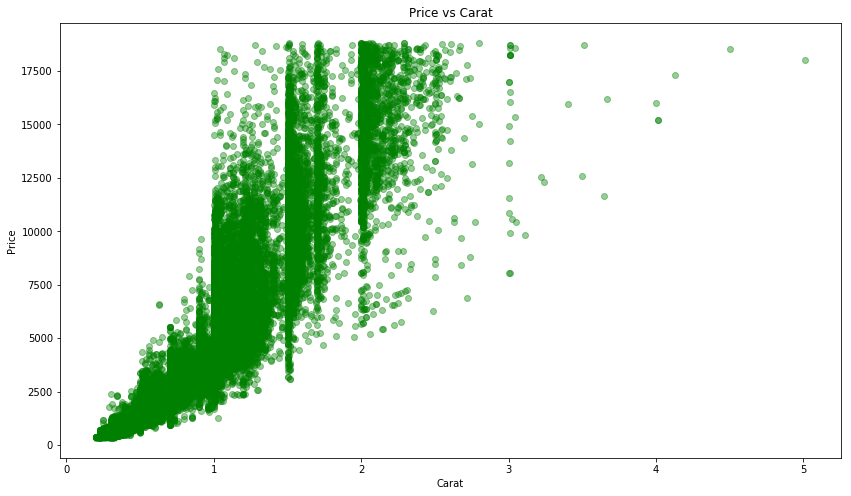

In [8]:
x = diamonds['carat']
y = diamonds['price']
plt.figure(figsize=(14,8))
plt.ylabel('Price')
plt.xlabel('Carat')
plt.title('Price vs Carat')
plt.scatter(x, y, alpha=0.4, color='green')

In [9]:
new_diamonds["predicted_price"] = calculate_diamond_price(new_diamonds['carat'],new_diamonds['cut_ord'], new_diamonds['clarity_ord'])

In [10]:
new_diamonds

Unnamed: 0  carat        cut  cut_ord color clarity  clarity_ord  \
0              1   1.22    Premium        4     G     SI1            3   
1              2   1.01       Good        2     G     VS2            5   
2              3   0.71  Very Good        3     I     VS2            5   
3              4   1.01      Ideal        5     D     SI2            2   
4              5   0.27      Ideal        5     H    VVS2            6   
5              6   0.52    Premium        4     G     VS1            4   
6              7   1.01    Premium        4     F     SI1            3   
7              8   0.59      Ideal        5     D     SI1            3   
8              9   1.01       Good        2     E     SI1            3   
9             10   2.03      Ideal        5     F     SI2            2   
10            11   1.35    Premium        4     H     VS2            5   
11            12   0.74      Ideal        5     G     SI1            3   
12            13   0.90    Premium        4     D     SI1            3   
13            14   0.30       Good        2     G     VS2            5   
14            15   1.01       Good        2     F     VS2            5   
15            16   1.02       Good        2     H     SI2            2   
16            17   2.05    Premium        4     G     SI1            3   
17            18   0.54      Ideal        5     I     SI1            3   
18            19   0.72      Ideal        5     G     VS2            5   
19            20   2.00    Premium        4     J     SI2            2   
20            21   1.57    Premium        4     G     SI2            2   
21            22   0.89    Premium        4     G     SI1            3   
22            23   0.33    Premium        4     I    VVS2            6   
23            24   0.30  Very Good        3     G      IF            8   
24            25   1.79  Very Good        3     I     VS2            5   
25            26   1.11      Ideal        5     E     SI2            2   
26            27   0.79    Premium        4     F     SI1            3   
27            28   0.71  Very Good        3     F     SI1            3   
28            29   0.73      Ideal        5     G     SI1            3   
29            30   0.90  Very Good        3     G     VS2            5   
...          ...    ...        ...      ...   ...     ...          ...   
2970        2971   1.00    Premium        4     F     VS2            5   
2971        2972   1.07    Premium        4     E     SI2            2   
2972        2973   1.21  Very Good        3     F     VS1            4   
2973        2974   0.46       Fair        1     G     VS1            4   
2974        2975   0.79       Good        2     I     VS2            5   
2975        2976   0.32      Ideal        5     F    VVS2            6   
2976        2977   0.40      Ideal        5     F     VS2            5   
2977        2978   0.51       Fair        1     E     VS2            5   
2978        2979   1.05    Premium        4     J     VS1            4   
2979        2980   0.43  Very Good        3     H     SI1            3   
2980        2981   0.30      Ideal        5     G    VVS2            6   
2981        2982   1.51    Premium        4     E     SI1            3   
2982        2983   1.54      Ideal        5     J     VS2            5   
2983        2984   1.16      Ideal        5     I     VS2            5   
2984        2985   1.01    Premium        4     D     SI1            3   
2985        2986   1.01  Very Good        3     I     VS2            5   
2986        2987   0.83    Premium        4     H     SI1            3   
2987        2988   0.93  Very Good        3     F     VS2            5   
2988        2989   1.20  Very Good        3     G     SI2            2   
2989        2990   0.80      Ideal        5     E    VVS2            6   
2990        2991   1.11      Ideal        5     D    VVS2            6   
2991        2992   1.31    Premium        4     H     SI2            2   
2992      

**2.** Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis. 

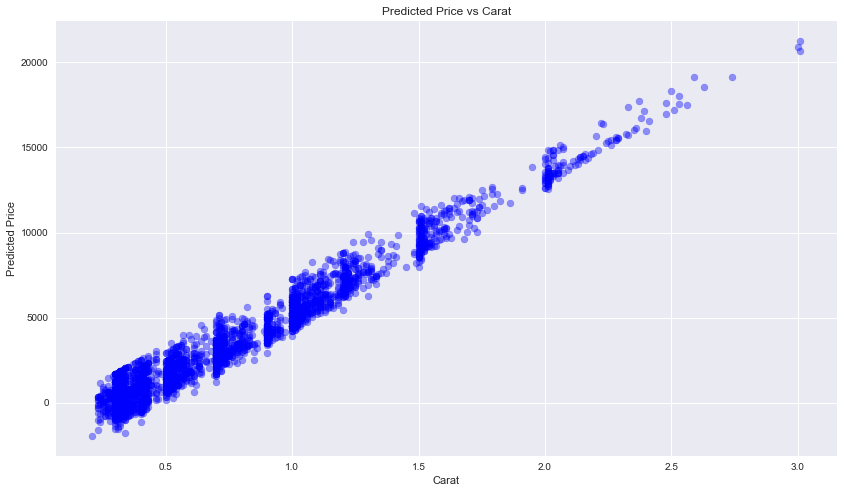

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(14,8))
x_new = new_diamonds['carat']
y_new = new_diamonds['predicted_price']
plt.ylabel('Predicted Price')
plt.xlabel('Carat')
plt.title('Predicted Price vs Carat')
plt.scatter(x_new, y_new, alpha=0.4, color = 'blue')

## Merge both plots to compare them

<function matplotlib.pyplot.show>

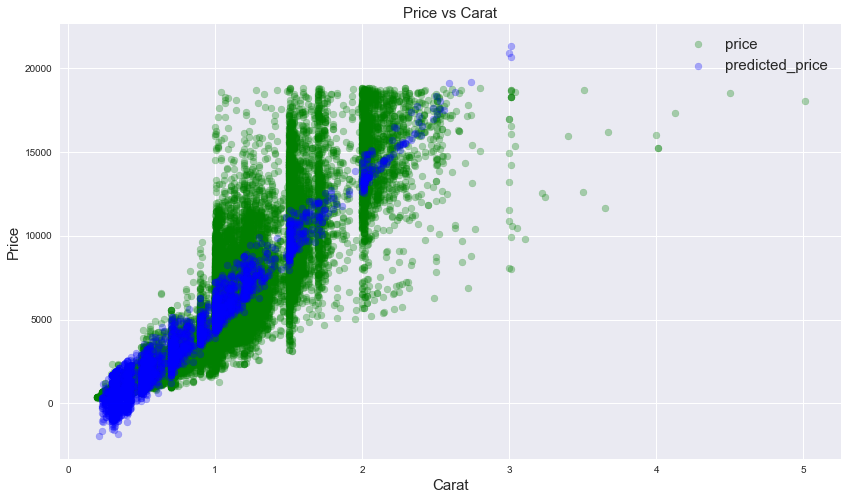

In [12]:
plt.figure(figsize=(14,8))
plt.scatter(x, y, alpha=0.3, color='green')
plt.scatter(x_new, y_new, alpha=0.3, color = 'blue')
plt.ylabel('Price', fontsize=15)
plt.xlabel('Carat', fontsize=15)
plt.title('Price vs Carat', fontsize=15)
plt.legend(loc='upper right', frameon=False, fontsize=15)
plt.show

**3.**	What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices? 

Comparing both plots we can see that the model is making a good average prediction on prices, we can conclude that the model is working fine and that predicted prices are correct.

# Recommendation

**1.** What price do you recommend the jewelry company to bid? Please explain how you arrived at that number.

In [13]:
total_diamonds_cost = np.sum(new_diamonds['predicted_price'])
print("Total diamonds cost estimate: ",format_currency(total_diamonds_cost))

Total diamonds cost estimate:  $11,733,522.76


In [14]:
bid_value = (total_diamonds_cost * 70) / 100

print("Total bid value recommendation: ",format_currency(bid_value))

Total bid value recommendation:  $8,213,465.93


The final retail price the consumer will pay for all 3,000 diamonds will add up to $11,733,522.76

Since the company generally purchases diamonds from distributors at 70% of the that price my **bid recommendation is $8,213,465.93** which is exactly 70% of the retail value.